In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df=pd.read_csv('data.csv')
import pickle

In [2]:
data=df.to_numpy()

In [3]:
data1=data[:,0]
x=len(data1)
x

1297

In [4]:
seperations=[0]
for i in range(len(data1)-1):
    if (data1[i+1]-data1[i])>=500:
        seperations.append(i)
    else:
        pass
seperations.append(x)
seperations

[0,
 75,
 135,
 247,
 494,
 546,
 608,
 756,
 993,
 1122,
 1139,
 1166,
 1213,
 1247,
 1275,
 1297]

In [5]:
segments=[]
for i in range(len(seperations)-1):
    segments.append(data[(seperations[i]+3):(seperations[i+1]-3)])

In [6]:
def dx(i): return dat.x[i]-dat.x[i-1]
def dy(i): return dat.y[i]-dat.y[i-1]
def dt(i): return dat.time[i]-dat.time[i-1]
def theta(i):
    feature=0
    feature=math.atan2(dx(i+1)*dy(i)-dx(i)*dy(i+1),dx(i+1)*dx(i)+dy(i+1)*dy(i))
    return feature
def sigma(start, end, fun): return sum([fun(i) for i in range(start, end)])
def rf1(d): return (d.x[2]-d.x[0])/math.sqrt((d.y[2]-d.y[0])**2+(d.x[2]-d.x[0])**2)
def rf2(d): return (d.y[2]-d.y[0])/math.sqrt((d.y[2]-d.y[0])**2+(d.x[2]-d.x[0])**2)
def rf3(d): return math.sqrt((max(d.y)-min(d.y))**2+(max(d.x)-min(d.x))**2)
def rf4(d): return math.atan2(max(d.y)-min(d.y), max(d.x)-min(d.x))
def rf5(d): return math.sqrt((d.x[len(d)-1]-d.x[0])**2+(d.y[len(d)-1]-d.y[0])**2)
def rf6(d): return (d.x[len(d)-1]-d.x[0])/rf5(d)
def rf7(d): return (d.y[len(d)-1]-d.y[0])/rf5(d)
def rf8(d): return sigma(1, len(d), lambda i: math.sqrt(dx(i)**2+dy(i)**2))
def rf9(d): return sigma(1, len(d)-1, theta)
def rf10(d): return sigma(1, len(d)-1, lambda i: abs(theta(i)))
def rf11(d): return sigma(1, len(d)-1, lambda i: theta(i)**2)
def rf12(d): return max([(dx(i)**2+dy(i)**2)/dt(i)**2 if dt(i) > 0 else 0 for i in range(1, len(d))])
def rf13(d): return d.time[len(d)-1]-d.time[0]

In [7]:
len(segments)

15

In [8]:
df_list=[]
for i in segments:
    df_list.append(pd.DataFrame(i,columns=['time','x','y']))

In [9]:
stroke_features=[]
for i in range(len(df_list)):
    temp=[]
    dat=df_list[i]
    f1=rf1(df_list[i])
    f2=rf2(df_list[i])
    f3=rf3(df_list[i])
    f4=rf4(df_list[i])
    f5=rf5(df_list[i])
    f6=rf6(df_list[i])
    f7=rf7(df_list[i])
    f8=rf8(df_list[i])
    f9=rf9(df_list[i])
    f10=rf10(df_list[i])
    f11=rf11(df_list[i])
    f12=rf12(df_list[i])
    f13=rf13(df_list[i])
    temp+=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]
    stroke_features.append(temp)

In [10]:
df=pd.DataFrame(stroke_features,columns=['rf1','rf2','rf3','rf4','rf5','rf6','rf7','rf8','rf9','rf10','rf11','rf12','rf13'])

In [11]:
df

,rf1,rf2,rf3,rf4,rf5,rf6,rf7,rf8,rf9,rf10,rf11,rf12,rf13
0,1.000000,0.000000,631.202820,0.025351,631.087355,0.999862,-0.016638,632.086711,-2.775558e-17,2.580622,0.316353,2.070312,1135.0
1,0.000000,1.000000,135.592220,1.533913,135.592220,-0.036875,0.999320,135.932236,-5.551115e-17,1.297243,0.200503,0.169550,884.0
2,-0.970143,0.242536,114.865138,0.859337,3.041381,0.986394,-0.164399,259.028611,5.819538e+00,18.717652,8.043264,0.254883,1750.0
3,0.000000,1.000000,186.706320,0.677250,4.031129,0.496139,-0.868243,596.754967,-1.570796e+00,48.788471,45.477716,0.305664,4507.0
4,1.000000,0.000000,233.004828,0.006438,233.000536,0.999998,-0.002146,233.138235,4.163336e-17,0.496580,0.051668,0.346021,750.0
5,0.099504,0.995037,138.676782,1.520298,138.573085,-0.032474,0.999473,139.855964,-9.065989e-02,4.292378,1.483746,0.125433,962.0
6,1.000000,0.000000,199.323857,0.290015,8.631338,-0.984784,-0.173785,414.796735,3.141593e+00,26.074120,13.013633,0.249135,2403.0
7,0.164399,0.986394,252.325682,0.629233,6.964194,0.358979,-0.933346,660.461201,4.712389e+00,33.437270,24.400229,0.774414,3939.0
8,-0.983870,-0.178885,156.634128,0.796684,4.031129,0.992278,-0.124035,359.522463,6.480581e+00,19.305929,6.772051,0.225779,2037.0
9,0.989949,-0.141421,31.780497,0.222082,31.780497,0.975441,-0.220261,32.092527,4.636476e-01,1.517091,0.355943,0.200195,167.0


list

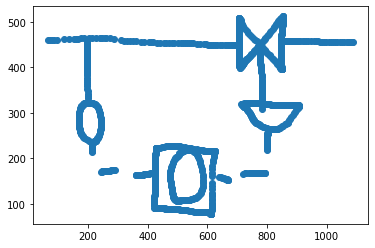

In [12]:
a=segments[6]
a=np.concatenate(segments)
plt.scatter(a[:,1],a[:,2])
type(segments)

# Single Link Euclidean Distance between strokes

In [13]:
import math
def distance(u,v):
    minimum=[]
    min_d=[]
    u=np.array(u)
    v=np.array(v)
    u=np.delete(u,0,1)
    v=np.delete(v,0,1)
    for i in range(len(u)):
        for j in range(len(v)):
            d=math.dist(u[i],v[j])
            minimum.append(d)
        minimum.sort()
        minum=minimum[0]
        min_d.append(minum)
    min_d.sort()
    return min_d[0]
composite=[]
for i in range(len(segments)):
    un=segments[i]
    distarr=[]
    dist_index=[]
    for j in range(len(segments)):
        vn=segments[j]
        sldist=distance(un,vn)
        distarr.append(sldist)
        dist_index.append(j)
    matrix=np.array([dist_index,distarr])
    composite.append(matrix)

In [14]:
c=np.array(composite)
c

array([[[  0.        ,   1.        ,   2.        ,   3.        ,
           4.        ,   5.        ,   6.        ,   7.        ,
           8.        ,   9.        ,  10.        ,  11.        ,
          12.        ,  13.        ,  14.        ],
        [  0.        ,   8.84590301, 142.50350873,   8.51469318,
         154.65849476,  78.05767099, 131.70516315, 228.50054705,
         233.73328817, 290.5068846 , 284.30661266, 213.53746744,
         287.47391186, 286.63042407, 232.50053763]],

       [[  0.        ,   1.        ,   2.        ,   3.        ,
           4.        ,   5.        ,   6.        ,   7.        ,
           8.        ,   9.        ,  10.        ,  11.        ,
          12.        ,  13.        ,  14.        ],
        [  8.84590301,   0.        ,   2.        , 510.16296416,
         657.        , 579.38242983, 513.01973646, 247.59291185,
         312.16021527, 468.51600826, 542.37187427, 604.01179624,
         226.62799915, 159.57835066,  91.92388155]],

       [

# Distinguishing between line and non-line segments

In [15]:
line_arr=[]
obj_arr=[]
for i in range(len(stroke_features)):
    r=stroke_features[i]
    end_to_end=r[4]
    length=r[7]
    if end_to_end>=0.90*length:
        line_arr.append(i)
    else:
        obj_arr.append(i)
        pass
line_arr,obj_arr

([0, 1, 4, 5, 9, 10, 11, 12, 13, 14], [2, 3, 6, 7, 8])

In [16]:
dashed=[]
lines=[]
for i in line_arr:
    r=stroke_features[i]
    length=r[7]
    if length<=80:
        dashed.append(i)
    else:
        lines.append(i)
dashed,lines

([9, 10, 11, 12, 13, 14], [0, 1, 4, 5])

In [17]:
objects=[]
for i in obj_arr:
    objects.append(stroke_features[i])

df_obj=pd.DataFrame(objects,columns=['rf1','rf2','rf3','rf4','rf5','rf6','rf7','rf8','rf9','rf10','rf11','rf12','rf13'])
df_obj
model=pickle.load(open('RFC.sav','rb'))
y_pred=model.predict(df_obj)
y_pred
obj_dict={}
for i in range(len(obj_arr)):
    obj_dict[obj_arr[i]]=y_pred[i]
obj_dict

C:\Users\Jason\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Jason\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{}

In [32]:
y_pred[4]

'Circle'

# Finding Circle in Square

In [18]:
minma=[]
for i in obj_arr:
    segs=np.array(segments[i])
    min_vals=np.amin(segs,0)
    max_vals=np.amax(segs,0)
    minma.extend([[min_vals[1],max_vals[1],min_vals[2],max_vals[2]]])

circle_in_square=[]
for i in range(0,len(minma)):
    minmax2=minma[i]
    minmax1=minma
    for j in range(0,len(minmax1)):
        if j==i:
            pass
        else:
            rfj=minmax1[j]
            if abs(minmax2[0]-rfj[0])<100:
                if abs(minmax2[1]-rfj[1])<100:
                    if abs(minmax2[2]-rfj[2])<100:
                        if abs(minmax2[3]-rfj[3])<100:
                            if i not in circle_in_square:
                                circle_in_square.append(i)
                                circle_in_square.append(j)

In [19]:
cont_objs=[]
for i in circle_in_square:
    cont_objs.append(obj_arr[i])
cont_objs

[7, 8]

# Determining Association through Euclidean Distance

In [20]:
sorted_neighbours=[]
for i in range(len(c)):
    a=c[i]
    xcalibre=np.argsort(a[1])
    xsorted=np.sort(a[1])
    xsorted=xsorted[xsorted<70.45]
    xsorted=xsorted[1:]
    xcalibre=xcalibre[1:len(xsorted)+1]
    sorted_neighbours.append(xcalibre)

In [21]:
xsorted,xcalibre

(array([ 3.        , 54.11330705]), array([ 2, 13], dtype=int64))

In [22]:
sorted_neighbours

[array([3, 1], dtype=int64),
 array([2, 0], dtype=int64),
 array([ 1, 14], dtype=int64),
 array([5, 4, 0], dtype=int64),
 array([3], dtype=int64),
 array([ 6,  3, 11], dtype=int64),
 array([ 5, 11], dtype=int64),
 array([ 8, 12,  9], dtype=int64),
 array([ 7,  9, 12], dtype=int64),
 array([ 7, 10,  8], dtype=int64),
 array([ 9, 11], dtype=int64),
 array([ 6,  5, 10], dtype=int64),
 array([ 7,  8, 13], dtype=int64),
 array([14, 12], dtype=int64),
 array([ 2, 13], dtype=int64)]

# Graph of connections

In [23]:
lines,dashed,obj_arr

([0, 1, 4, 5], [9, 10, 11, 12, 13, 14], [2, 3, 6, 7, 8])

In [24]:
lines_dict={}
for i in lines:
    lines_dict[i]='line'
dashed_dict={}
for i in dashed:
    dashed_dict[i]='dashed'

lines_dict.update(dashed_dict)
lines_dict.update(obj_dict)
lines_dict

{0: 'line1',
 1: 'line2',
 4: 'line3',
 5: 'line4',
 9: 'dashed1',
 10: 'dashed2',
 11: 'dashed3',
 12: 'dashed4',
 13: 'dashed5',
 14: 'dashed6',
 2: 'Circle',
 3: 'Valve ',
 6: 'Semi (',
 7: 'Square',
 8: 'Circle'}

In [25]:
class Symbol():
    def __init__(self, symtype):
        self.symtype=symtype
        self.neighbors=set()
    def assoc(self, other):
        self.neighbors.add(other)
    def dissoc(self, other):
        self.neighbors.discard(other)
        other.neighbors.discard(self)
    # def merge(self, other):
    #     self.dissoc(other)
    #     self.symtype+=other.symtype
    #     other.symtype=self.symtype
    #     self.neighbors.update(other.neighbors)
    #     other.neighbors.update(self.neighbors)
    def __repr__(self):
        return self.symtype+' '+str([x.symtype for x in self.neighbors])

In [26]:
symbols = [Symbol('None') for i in lines_dict]
for i in lines_dict.items():
    symbols[i[0]].symtype = i[1]
    for j in sorted_neighbours[i[0]]:
        symbols[i[0]].assoc(symbols[j])

In [27]:
# Merges circle & square
s1, s2 = symbols[cont_objs[0]], symbols[cont_objs[1]]
s1.symtype += s2.symtype
s2.symtype = 'None'
s1.neighbors.update(s2.neighbors)
for i in symbols:
    i.dissoc(s2)

In [28]:
# Remove line-dash association
temp = []
for i in symbols:
    for j in i.neighbors:
        if i.symtype == 'line' and j.symtype == 'dashed' or i.symtype == 'dashed' and j.symtype == 'line':
            temp.append((i, j))
for i in temp:
    i[0].dissoc(i[1])
symbols


[line ['Valve ', 'line'],
 line ['Circle', 'line'],
 Circle ['line', 'dashed'],
 Valve  ['line', 'line', 'line'],
 line ['Valve '],
 line ['Semi (', 'Valve '],
 Semi ( ['line', 'dashed'],
 SquareCircle ['dashed', 'SquareCircle', 'dashed'],
 None [],
 dashed ['dashed', 'SquareCircle'],
 dashed ['dashed', 'dashed'],
 dashed ['Semi (', 'dashed'],
 dashed ['dashed', 'SquareCircle'],
 dashed ['dashed', 'dashed'],
 dashed ['Circle', 'dashed']]

In [29]:
current = symbols[0]
seq=[current.symtype]
while True:
    if len(current.neighbors) == 0:
        break
    nextSym = list(current.neighbors)[-1]
    current.dissoc(nextSym)
    # print(current.symtype+'->'+nextSym.symtype)
    seq.append(nextSym.symtype)
    current = nextSym
while seq[0]=='line' or seq[0]=='dashed':
    seq=seq[1:]
trailLinestyle='-' if seq[-1]=='line' else '--'
while seq[-1]=='line' or seq[-1]=='dashed':
    seq=seq[:-1]
seq, trailLinestyle

(['Circle',
  'dashed',
  'dashed',
  'dashed',
  'SquareCircle',
  'dashed',
  'dashed',
  'dashed',
  'Semi (',
  'line',
  'Valve '],
 '-')

# Graph amalgamation

In [30]:
import schemdraw
from schemdraw.segments import *
from schemdraw.elements import *

In [31]:
valHeight=0.5
valWidth=1
gap = (math.nan, math.nan)  # Put a gap in a path
class Valve(Element2Term):
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0), gap, (valWidth, 0)]))
        self.segments.append(Segment([(0, 0),
                                      (0, valHeight),
                                      (0, -valHeight),
                                      (valWidth, valHeight),
                                      (valWidth, -valHeight),
                                      (0, valHeight),
                                      ]))


ctrlHeight=0.5
ctrlWidth=1
class Control(Element2Term):
    ''' Generic source element '''
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0),gap,(ctrlWidth, 0)]))
        self.segments.append(Segment([(0, ctrlHeight),
                                      (0, -ctrlHeight),
                                      (ctrlWidth, -ctrlHeight),
                                      (ctrlWidth, ctrlHeight),
                                      (0, ctrlHeight)]))
        self.segments.append(SegmentCircle((0.5, 0), 0.5,))


semiHeight=0.5
semiWidth=0.5
class Semi(Element2Term):
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0),gap,(semiWidth, 0)]))
        self.segments.append(Segment([(0, semiHeight),(0, -semiHeight)]))
        self.segments.append(SegmentArc((0, 0), semiWidth*2, semiWidth*2, 270, 90))

class Circle(Element2Term):
    def __init__(self, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0), (0, 0), gap, (1, 0), (1, 0)]))
        self.segments.append(SegmentCircle((0.5, 0), 0.5,))

In [32]:
def drawSeg(symtype):
    global theta
    if symtype == 'line':
        theta += 90
        return [Line(), Line(theta=theta)]
    if symtype == 'dashed':
        theta += 90
        return [Line(ls='--'), Line(ls='--', theta=theta)]
    if symtype == 'Circle':
        return [Circle(extend=False)]
    if symtype == 'Valve ':
        return [Valve(extend=False)]
    if symtype == 'Semi (':
        return [Semi(extend=False)]
    if symtype == 'SquareCircle':
        return [Control(extend=False)]


Circle
dashed
SquareCircle
dashed
Semi (
line
Valve 


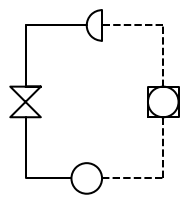

In [33]:
theta = 0
with schemdraw.Drawing() as d:
    d.config(unit=2.0)
    prev=None
    for i in seq:
        if i==prev:
            continue
        d.add_elements(*drawSeg(i))
        prev=i
        print(i)
    d.add(Wire('|-', ls=trailLinestyle).to((0,0)))